In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [ ]:
def clean_outlines_salarys(df, columna):
  Q1 = df[columna].quantile(0.5)
  Q3 = df[columna].quantile(0.8)
  IQR = Q3-Q1
  limit_lower = Q1 - 1.5 * IQR
  limit_upper = Q3 + 1.5 * IQR
  return df[(df[columna] > limit_lower) & (df[columna] < limit_upper)]

In [ ]:
def clean_education(x):
  if(pd.isna(x)):
    return 'Less than a Bachelors'
  if 'Bachelor’s degree' in x:
    return 'Bachelor’s degree'
  if 'Master’s degree' in x:
      return 'Master’s degree'
  if 'Professional degree' in x or 'Other doctoral' in x:
      return 'Post grad'
  return 'Less than a Bachelors'

  Limpieza de datos


In [ ]:
# Datos a analizar
features = ["ResponseId", "ConvertedCompYearly", "Country", "WorkExp", "EdLevel", "Employment", "DevType", "AIThreat"]

# Lectura del archivo csv
data = pd.read_csv("/content/sample_data/survey_results_public.csv", usecols=features)

# Renombramiento de columna para una mejor legibilidad
data = data.rename({"ConvertedCompYearly": "Salary"}, axis=1)

# Eliminación de salarios nulos/inexistentes
data = data.dropna(subset=["Salary"])

# Nos quedamos con sueldos entre $10k y $200k
data = data[(data["Salary"] >= 10000)  & (data["Salary"] <= 200000)]

# Aplicamos una función para renombrar los estudios de los usuarios
data['EdLevel'] = data['EdLevel'].apply(clean_education)

# Modificamos el estado de las respuestas nulas a "I'm not sure"
data['AIThreat'] = data['AIThreat'].transform(lambda x: x.fillna("I'm not sure"))

# Filtramos a los usuario que tienen empleo
data = data[data["Employment"] == "Employed"]

# Asignamos 0 de experiencia aquellos valores nulos
data = data[data['WorkExp'].isna() == 0]

Distribución de Salarios

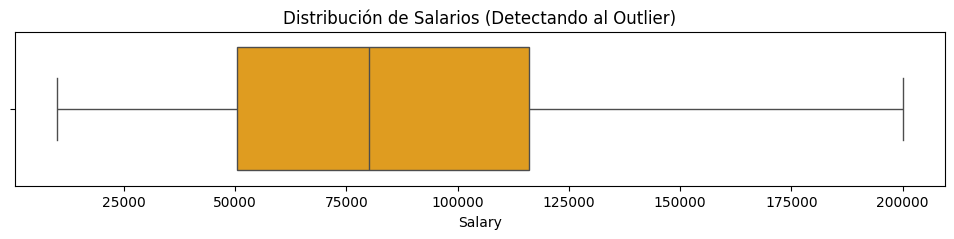

In [ ]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['Salary'], color='orange')
plt.title('Distribución de Salarios')
plt.show()

Salario y Nivel de Educación

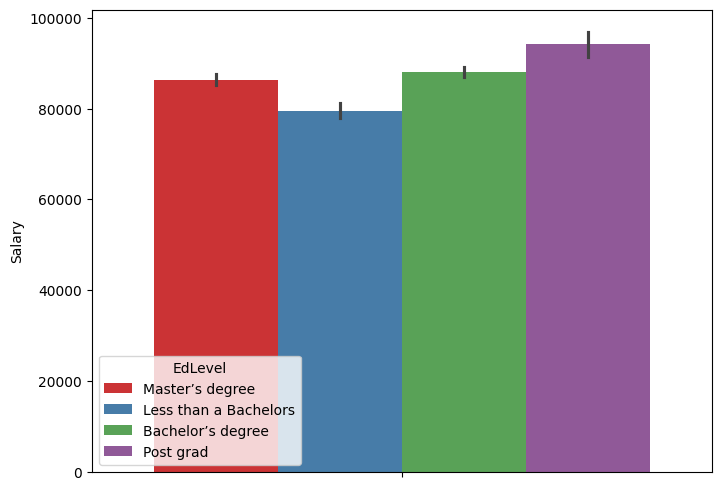

In [ ]:
plt.subplots(figsize =(8, 6))
sns.barplot(data=data,  y="Salary", palette="Set1", hue="EdLevel",)
plt.show()

Puestos con mayores y menores ganancias

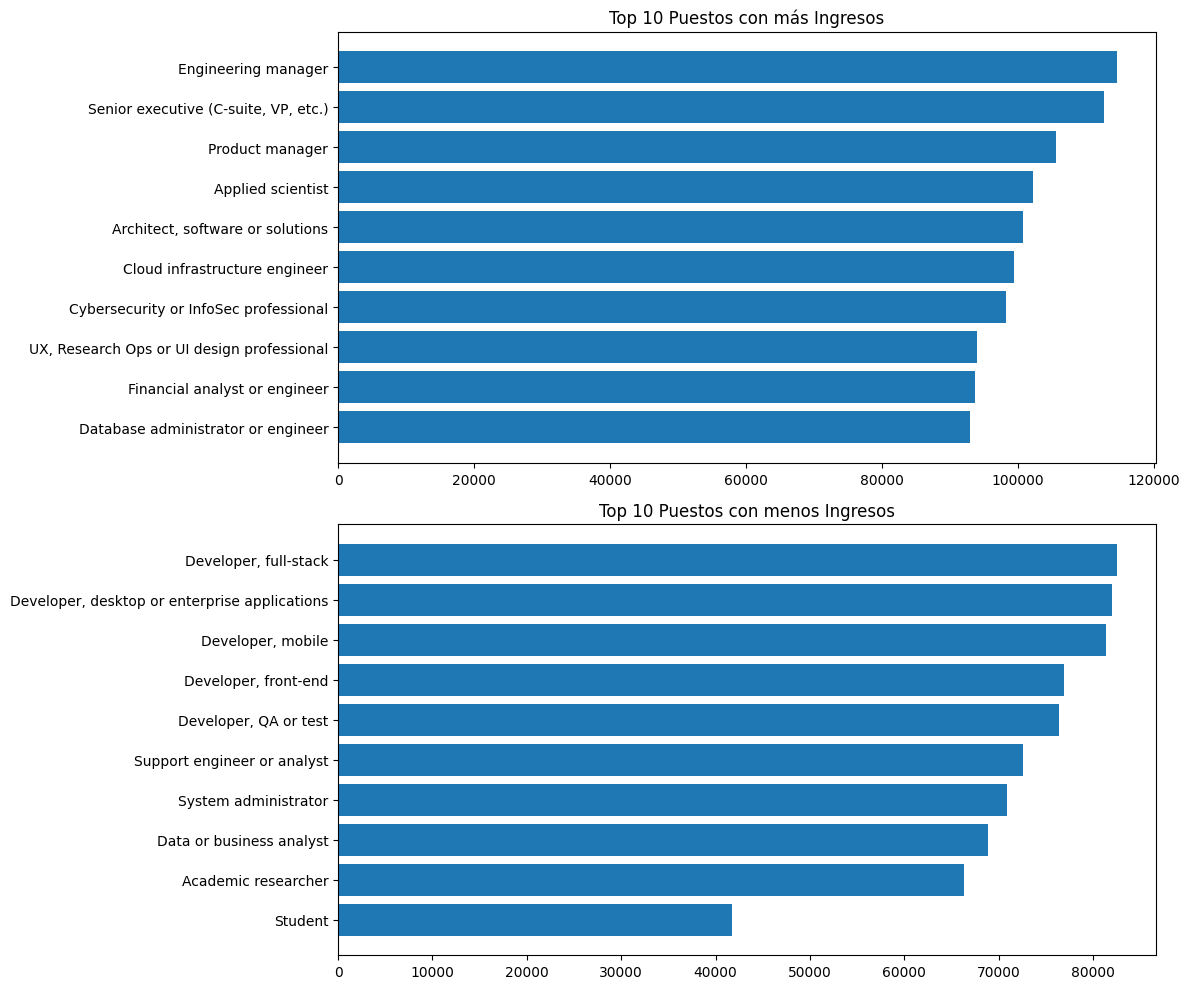

In [ ]:
jobs_salary = data.groupby('DevType')['Salary'].mean().sort_values(ascending=False)
top_job_salary = jobs_salary.head(10)
bottom_job_salary = jobs_salary.tail(10)

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].barh(top_job_salary.index, top_job_salary.values)
ax[0].set_title('Top 10 Puestos con más Ingresos')
ax[0].invert_yaxis()

ax[1].barh(bottom_job_salary.index, bottom_job_salary.values)
ax[1].set_title('Top 10 Puestos con menos Ingresos')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

Opinion respecto a la IA

<Axes: xlabel='AIThreat', ylabel='count'>

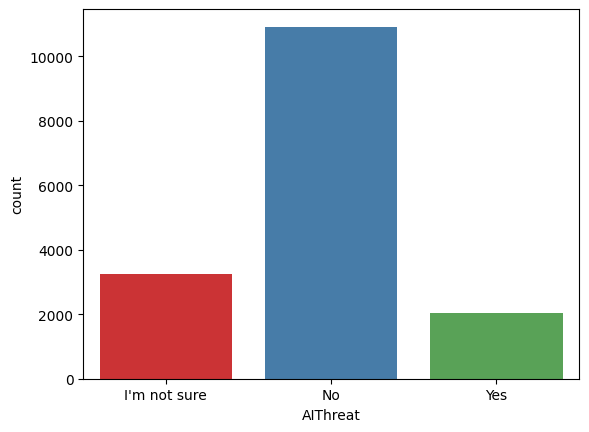

In [ ]:
sns.countplot(x ='AIThreat', data = data,  palette="Set1", hue="AIThreat")

Países con mayores y menores ganancias

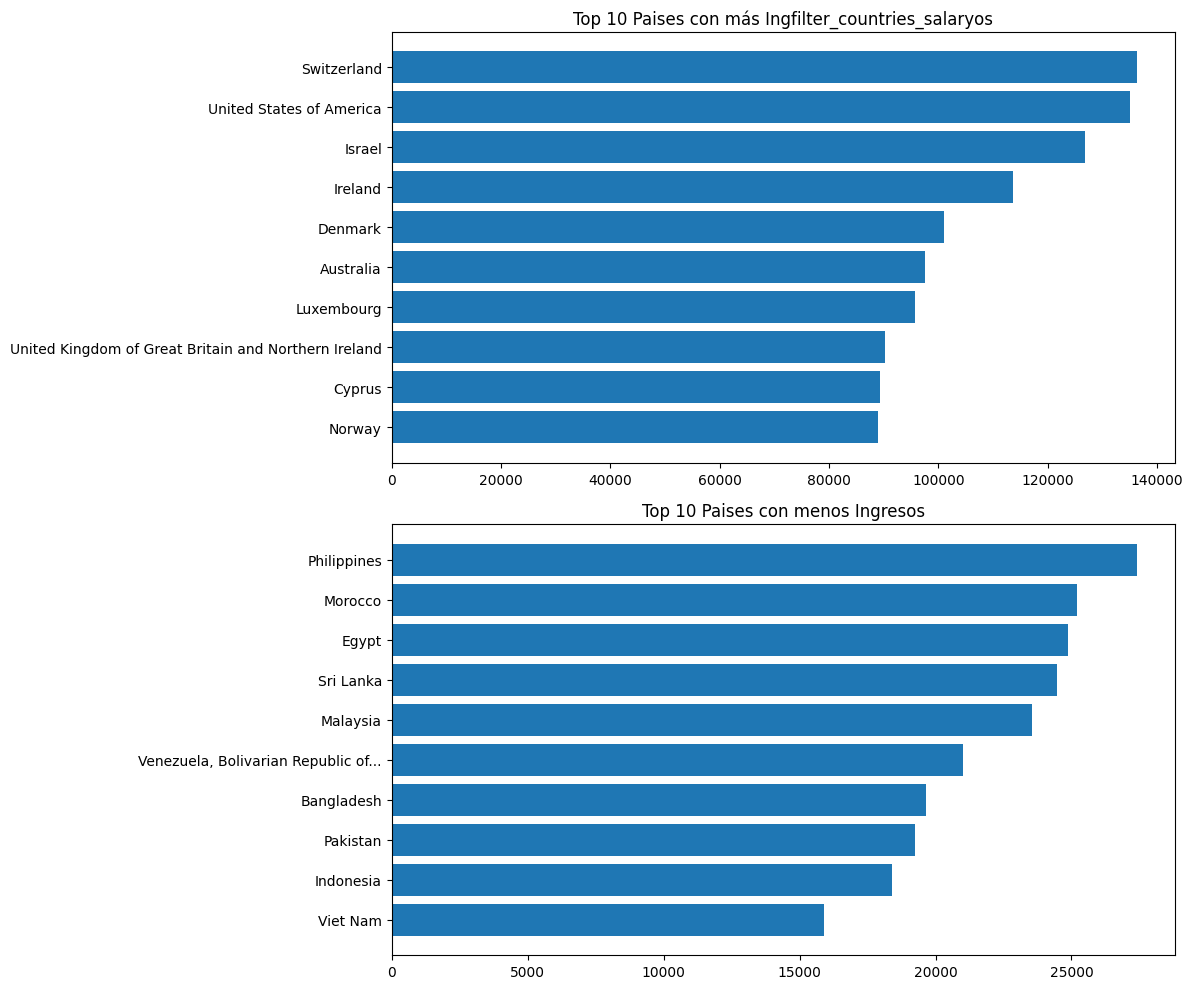

In [ ]:
filter_countries = (
    (data.groupby("Country").filter(lambda x: len(x) > 10))
    .groupby("Country")["Salary"].median().sort_values(ascending=False)
)

top_filter_countries = filter_countries.head(10)
bottom_filter_countries = filter_countries.tail(10)

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].barh(top_filter_countries.index, top_filter_countries.values)
ax[0].set_title('Top 10 Paises con más Ingfilter_countries_salaryos')
ax[0].invert_yaxis()

ax[1].barh(bottom_filter_countries.index, bottom_filter_countries.values)
ax[1].set_title('Top 10 Paises con menos Ingresos')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


MACHINE LEARNING

EDUCATION USERS

*   0 = **Less than a Bachelors**
*   1 = **Bachelor’s degree**
*   2 = **Master’s degree**
*   3 = **Post grad**

array([[<Axes: title={'center': 'ResponseId'}>,
        <Axes: title={'center': 'EdLevel'}>],
       [<Axes: title={'center': 'WorkExp'}>,
        <Axes: title={'center': 'DevType'}>],
       [<Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

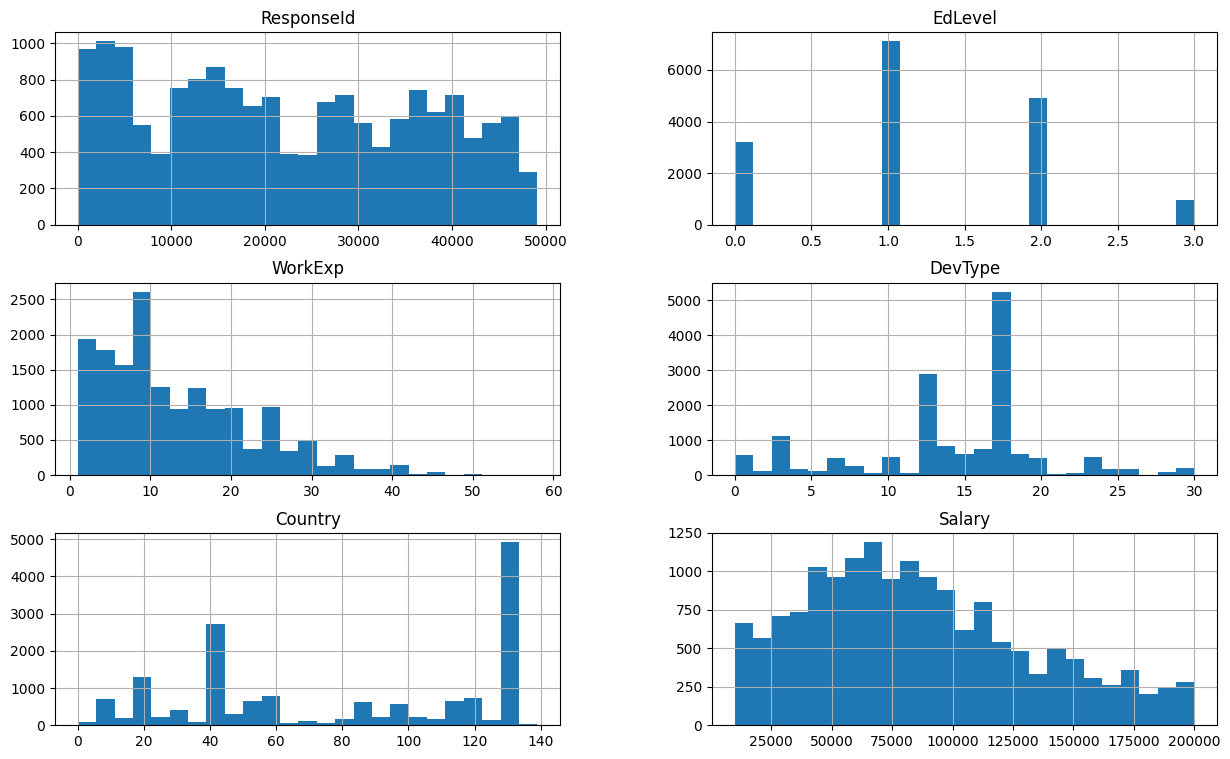

In [ ]:
data_ordinal = data.copy()
education_order = ["Less than a Bachelors", "Bachelor’s degree", "Master’s degree", "Post grad"]
#AIThreat_order = ["Yes", "No", "I'm not sure"]

ordinal_encoder_education = OrdinalEncoder(categories=[education_order])
#ordinal_encoder_aithreat = OrdinalEncoder(categories=[AIThreat_order])

data_ordinal["EdLevel"] = ordinal_encoder_education.fit_transform(data[["EdLevel"]])
#data_ordinal["AIThreat"] = ordinal_encoder_aithreat.fit_transform(data[["AIThreat"]])

data_ordinal.head()

df_label = data_ordinal.copy()
label_encoder = {}

for col in ['DevType', 'Country']:
  le = LabelEncoder()
  df_label[col] = le.fit_transform(data_ordinal[col])
  label_encoder[col] = le

df_label.hist(figsize=(15,9), bins=25)

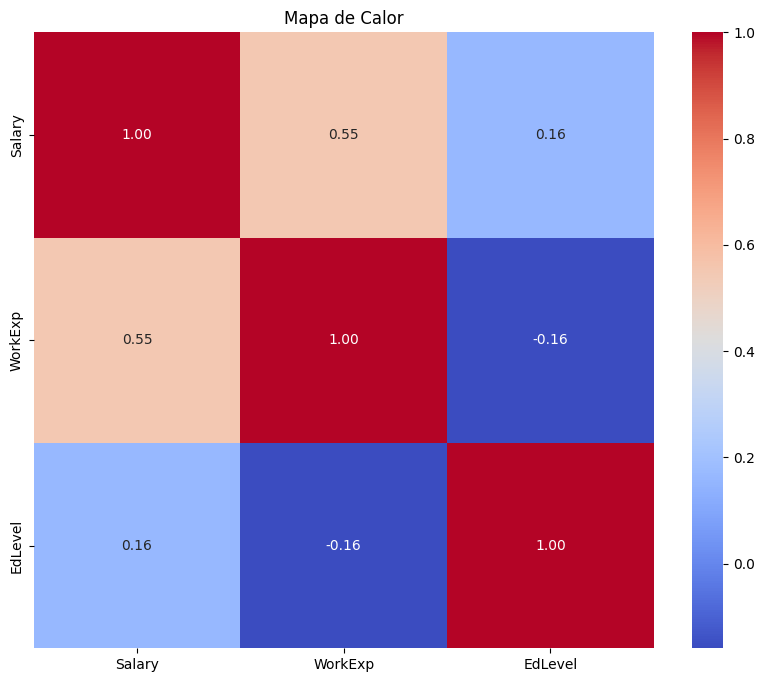

In [ ]:
df_label_update = df_label.drop(columns=['AIThreat', 'Employment', 'ResponseId', 'Country'])

median_data = pd.DataFrame()

median_data["Salary"] = df_label_update.groupby('DevType')['Salary'].median()
median_data["WorkExp"] = df_label_update.groupby('DevType')['WorkExp'].median()
median_data["EdLevel"] = df_label_update.groupby('DevType')['EdLevel'].median()

# 1. Matriz de Correlación
plt.figure(figsize=(10, 8))
# Calculamos la correlación entre todas las columnas
heatmap = sns.heatmap(median_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor')
plt.show()


In [ ]:
#VALIDACION DE DATOS NULOS
#print(f"datos nulos ", data.isna().sum())
#df_label.hist(figsize=(15,9), bins=25)